## Import Library

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import math

import tensorflow as tf
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df =pd.read_csv('./drive/MyDrive/Data_GMV/forecast_gmv_06_12_2024.csv')
# df["date"] = pd.to_datetime(df['date'], dayfirst=True)
# df["date"] = df["date"].dt.strftime('%d-%m-%Y')

df.head()

,date,gmv,quantity,total_male,total_female,total_unknown,total_order
0,2024-06-12,46898.0,267,9,18,1,28
1,2024-06-11,213466.0,1410,26,99,7,132
2,2024-06-10,171892.0,1072,18,80,15,113
3,2024-06-09,173227.0,945,24,82,9,115
4,2024-06-08,177293.0,1128,26,83,15,124


In [ ]:
# Define new rows as a DataFrame
new_rows = pd.DataFrame({
    'date': [pd.to_datetime('2024-06-13'), pd.to_datetime('2024-06-14'), pd.to_datetime('2024-06-15'), pd.to_datetime('2024-06-16'), pd.to_datetime('2024-06-17'), pd.to_datetime('2024-06-18'),
             pd.to_datetime('2024-06-19'), pd.to_datetime('2024-06-20'), pd.to_datetime('2024-06-21'), pd.to_datetime('2024-06-22'), pd.to_datetime('2024-06-23'), pd.to_datetime('2024-06-24'),
             pd.to_datetime('2024-06-25'),pd.to_datetime('2024-06-26'),pd.to_datetime('2024-06-27'),pd.to_datetime('2024-06-28'),pd.to_datetime('2024-06-29'),pd.to_datetime('2024-06-30'),pd.to_datetime('2024-07-01'),
             pd.to_datetime('2024-07-02'), pd.to_datetime('2024-07-03')
             ],
    'gmv': [211619, 210396, 232173, 208262, 162534, 200252, 208692, 190115, 232990, 207749, 196004, 229341, 225226 ,246038, 214500 , 218507, 193665, 242967, 218320,229796 ,251898]
})
df['gmv'][df['date'] == '2024-06-12'] = 212833
# Add the new rows using concat
df = pd.concat([df, new_rows], ignore_index=True)

<ipython-input-61-2f6e5a11309f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['gmv'][df['date'] == '2024-06-12'] = 212833


## Convert Data Types

In [ ]:
#Covert data types
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')
# df = df[(df['date'] >= '2023-01-01')]
df.shape

(695, 7)

In [ ]:
df.sort_values(by="date").tail()

,date,gmv,quantity,total_male,total_female,total_unknown,total_order
690,2024-06-29,193665.0,NaN,NaN,NaN,NaN,NaN
691,2024-06-30,242967.0,NaN,NaN,NaN,NaN,NaN
692,2024-07-01,218320.0,NaN,NaN,NaN,NaN,NaN
693,2024-07-02,229796.0,NaN,NaN,NaN,NaN,NaN
694,2024-07-03,251898.0,NaN,NaN,NaN,NaN,NaN


### Data Cleaning

In [ ]:
# Function to replace outliers with the mean of the rest of the values
from scipy.stats import zscore
df1 = df.copy()


def replace_outliers_with_mean(df, column_name):
    # Calculate Z-scores
    z_scores = zscore(df[column_name])

    # Identify outliers (using a threshold of 3 for Z-score)
    outliers = np.abs(z_scores) > 3

    # Calculate mean of non-outliers
    mean_non_outliers = df.loc[~outliers, column_name].mean()

    # Replace outliers with the mean of non-outliers
    df.loc[outliers, column_name] = mean_non_outliers

    return df

# Replace outliers in 'gmv' column
df = replace_outliers_with_mean(df, 'gmv')

# Display the DataFrame
df[['date', 'gmv']][df['date'] == '2024-06-05']

,date,gmv
7,2024-06-05,184519.0


In [ ]:
# Display the DataFrame
df.iloc[120:140]

,date,gmv,quantity,total_male,total_female,total_unknown,total_order
553,2022-12-07,61717.0,273.0,10.0,38.0,2.0,50.0
552,2022-12-08,57223.0,258.0,12.0,44.0,4.0,60.0
551,2022-12-09,105296.0,670.0,18.0,76.0,10.0,104.0
550,2022-12-10,60803.0,306.0,7.0,42.0,2.0,51.0
549,2022-12-11,62246.0,301.0,6.0,43.0,0.0,49.0
548,2022-12-12,602862.0,3926.0,133.0,766.0,57.0,948.0
547,2022-12-13,53565.0,200.0,7.0,34.0,2.0,41.0
546,2022-12-14,61109.0,217.0,9.0,34.0,3.0,46.0
545,2022-12-15,115220.0,268.0,8.0,46.0,10.0,64.0
544,2022-12-16,145859.0,827.0,32.0,154.0,13.0,199.0


In [ ]:
df.tail()

,date,gmv,quantity,total_male,total_female,total_unknown,total_order
690,2024-06-29,193665.0,NaN,NaN,NaN,NaN,NaN
691,2024-06-30,242967.0,NaN,NaN,NaN,NaN,NaN
692,2024-07-01,218320.0,NaN,NaN,NaN,NaN,NaN
693,2024-07-02,229796.0,NaN,NaN,NaN,NaN,NaN
694,2024-07-03,251898.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 695 entries, 673 to 694
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           695 non-null    datetime64[ns]
 1   gmv            695 non-null    float64       
 2   quantity       674 non-null    float64       
 3   total_male     674 non-null    float64       
 4   total_female   674 non-null    float64       
 5   total_unknown  674 non-null    float64       
 6   total_order    674 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 43.4 KB


In [ ]:
# เช็ค Null
df.isnull().sum()

date              0
gmv               0
quantity         21
total_male       21
total_female     21
total_unknown    21
total_order      21
dtype: int64

In [ ]:
# เช็ค 0s
df.eq(0).sum()

date              0
gmv               0
quantity          0
total_male       10
total_female      3
total_unknown    47
total_order       0
dtype: int64

In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
df.isnull().sum()

date             0
gmv              0
quantity         0
total_male       0
total_female     0
total_unknown    0
total_order      0
dtype: int64

In [ ]:
df.sort_values(by="date").tail()

,date,gmv,quantity,total_male,total_female,total_unknown,total_order
690,2024-06-29,193665.0,996.22997,24.606825,102.498516,9.605341,136.421365
691,2024-06-30,242967.0,996.22997,24.606825,102.498516,9.605341,136.421365
692,2024-07-01,218320.0,996.22997,24.606825,102.498516,9.605341,136.421365
693,2024-07-02,229796.0,996.22997,24.606825,102.498516,9.605341,136.421365
694,2024-07-03,251898.0,996.22997,24.606825,102.498516,9.605341,136.421365


## Feature Engineering

In [ ]:
df['Quarter'] = df['date'].dt.quarter
df['Month'] = df['date'].dt.month
df['Weekday'] = df['date'].dt.weekday + 1  # Adding 1 to make it 1-7 (Mon-Sun)
df['Dayofyear'] = df['date'].dt.dayofyear
df['double_date'] = df['date'].apply(lambda x: 1 if x.month == x.day else 0)
df['mid_month'] = df['date'].apply(lambda x: 1 if x.day == 15 else 0)
df['payday'] = df['date'].apply(lambda x: 1 if x.day>=25 else 0)

In [ ]:
df.sort_values(by=['date'])

,date,gmv,quantity,total_male,total_female,total_unknown,total_order,Quarter,Month,Weekday,Dayofyear,double_date,mid_month,payday
673,2022-08-09,28795.0,92.00000,5.000000,12.000000,0.000000,17.000000,3,8,2,221,0,0,0
672,2022-08-10,8850.0,20.00000,3.000000,2.000000,1.000000,6.000000,3,8,3,222,0,0,0
671,2022-08-11,5260.0,11.00000,0.000000,3.000000,0.000000,3.000000,3,8,4,223,0,0,0
670,2022-08-12,3140.0,3.00000,0.000000,2.000000,0.000000,2.000000,3,8,5,224,0,0,0
669,2022-08-13,3230.0,8.00000,1.000000,1.000000,0.000000,2.000000,3,8,6,225,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,2024-06-29,193665.0,996.22997,24.606825,102.498516,9.605341,136.421365,2,6,6,181,0,0,1
691,2024-06-30,242967.0,996.22997,24.606825,102.498516,9.605341,136.421365,2,6,7,182,0,0,1
692,2024-07-01,218320.0,996.22997,24.606825,102.498516,9.605341,136.421365,3,7,1,183,0,0,0
693,2024-07-02,229796.0,996.22997,24.606825,102.498516,9.605341,136.421365,3,7,2,184,0,0,0


In [ ]:
df = df.set_index('date')


In [ ]:
df

,gmv,quantity,total_male,total_female,total_unknown,total_order,Quarter,Month,Weekday,Dayofyear,double_date,mid_month,payday
date,,,,,,,,,,,,,
2022-08-09,28795.0,92.00000,5.000000,12.000000,0.000000,17.000000,3,8,2,221,0,0,0
2022-08-10,8850.0,20.00000,3.000000,2.000000,1.000000,6.000000,3,8,3,222,0,0,0
2022-08-11,5260.0,11.00000,0.000000,3.000000,0.000000,3.000000,3,8,4,223,0,0,0
2022-08-12,3140.0,3.00000,0.000000,2.000000,0.000000,2.000000,3,8,5,224,0,0,0
2022-08-13,3230.0,8.00000,1.000000,1.000000,0.000000,2.000000,3,8,6,225,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-29,193665.0,996.22997,24.606825,102.498516,9.605341,136.421365,2,6,6,181,0,0,1
2024-06-30,242967.0,996.22997,24.606825,102.498516,9.605341,136.421365,2,6,7,182,0,0,1
2024-07-01,218320.0,996.22997,24.606825,102.498516,9.605341,136.421365,3,7,1,183,0,0,0


<Axes: xlabel='date'>

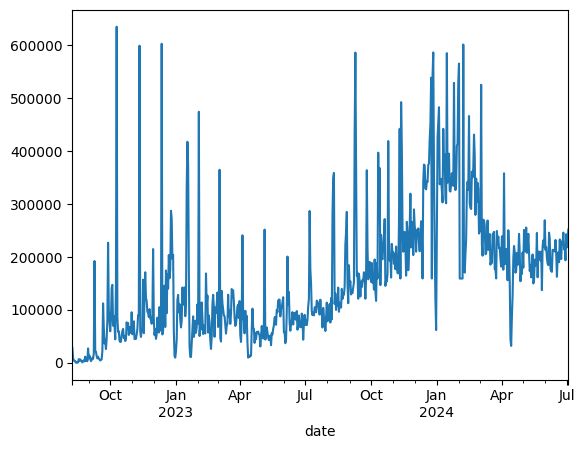

In [ ]:
df['gmv'].plot()

In [ ]:
df2 = df.copy()

In [ ]:
def df_to_X_y (df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)



In [ ]:
WINDOW_SIZE = 5
X, y = df_to_X_y(df['gmv'], WINDOW_SIZE)
X.shape, y.shape

((690, 5, 1), (690,))

In [ ]:
int(541*0.8)

432

In [ ]:
X_train, y_train = X[:432], y[:432]
X_test, y_test = X[432:], y[432:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((432, 5, 1), (432,), (258, 5, 1), (258,))

## Multiple Features

In [ ]:
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model
from keras.metrics import RootMeanSquaredError

In [ ]:
df.head()

,gmv,quantity,total_male,total_female,total_unknown,total_order,Quarter,Month,Weekday,Dayofyear,double_date,mid_month,payday
date,,,,,,,,,,,,,
2022-08-09,28795.0,92.0,5.0,12.0,0.0,17.0,3,8,2,221,0,0,0
2022-08-10,8850.0,20.0,3.0,2.0,1.0,6.0,3,8,3,222,0,0,0
2022-08-11,5260.0,11.0,0.0,3.0,0.0,3.0,3,8,4,223,0,0,0
2022-08-12,3140.0,3.0,0.0,2.0,0.0,2.0,3,8,5,224,0,0,0
2022-08-13,3230.0,8.0,1.0,1.0,0.0,2.0,3,8,6,225,0,0,0


In [ ]:
# df = df.drop(columns=['quantity', 'total_male', 'total_female', 'total_unknown', 'total_order'])
df.head()

,gmv,quantity,total_male,total_female,total_unknown,total_order,Quarter,Month,Weekday,Dayofyear,double_date,mid_month,payday
date,,,,,,,,,,,,,
2022-08-09,28795.0,92.0,5.0,12.0,0.0,17.0,3,8,2,221,0,0,0
2022-08-10,8850.0,20.0,3.0,2.0,1.0,6.0,3,8,3,222,0,0,0
2022-08-11,5260.0,11.0,0.0,3.0,0.0,3.0,3,8,4,223,0,0,0
2022-08-12,3140.0,3.0,0.0,2.0,0.0,2.0,3,8,5,224,0,0,0
2022-08-13,3230.0,8.0,1.0,1.0,0.0,2.0,3,8,6,225,0,0,0


In [ ]:
# [ [ [g1],[g2],[g3],[g4],[g5] ] ] [g6]
# [ [ [g2],[g3],[g4],[g5],[g6] ] ] [g7]

# [ [ [g1, q1, g3],[g2, q1],[g3, q1],[g4, q1],[g5, q1] ] ] ==> [g6]

def df_to_X_y2 (df, window_size=7):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][0]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
X2, y2 = df_to_X_y2(df)
X2.shape, y2.shape

((688, 7, 13), (688,))

In [ ]:
X2_train, y2_train = X2[:int(len(df)*0.8)], y2[:int(len(df)*0.8)]
X2_test, y2_test = X2[int(len(df)*0.8):], y2[int(len(df)*0.8):]
X2_train.shape, y2_train.shape, X2_test.shape, y2_test.shape

((556, 7, 13), (556,), (132, 7, 13), (132,))

In [ ]:
X2_train

array([[[-9.43406949e-01,  9.20000000e+01,  5.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.10464489e+00,  2.00000000e+01,  3.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.13366692e+00,  1.10000000e+01,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [-1.15007770e+00,  8.00000000e+00,  1.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.17376419e+00,  1.00000000e+00,  1.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.16301230e+00,  2.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  1.00000000e+00,  0.00000000e+00]],

       [[-1.10464489e+00,  2.00000000e+01,  3.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-1.13366692e+00,  1.10000000e+01,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e

In [ ]:
gmv_training_mean = np.mean(X2_train[:, :, 0])
gmv_training_std = np.std(X2_train[:, :, 0])

def preprocess(X):
  X[:, :, 0] = (X[:, :, 0] - gmv_training_mean) / gmv_training_std
  return X

def preprocess_output(y):
  y = (y - gmv_training_mean) / gmv_training_std
  return y

In [ ]:
X2_train = preprocess(X2_train)
X2_test = preprocess(X2_test)

In [ ]:
y2_train = preprocess_output(y2_train)
y2_test = preprocess_output(y2_test)

In [ ]:
model4 = Sequential()
model4.add(InputLayer(input_shape=(7, 13)))
model4.add(LSTM(50, return_sequences = True,))
model4.add(LSTM(50, ))
model4.add(Dense(25, 'relu'))
model4.add(Dense(1, 'linear'))

model4.summary()
model4.compile(loss='mse', optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 7, 50)             12800     
                                                                 
 lstm_9 (LSTM)               (None, 50)                20200     
                                                                 
 dense_12 (Dense)            (None, 25)                1275      
                                                                 
 dense_13 (Dense)            (None, 1)                 26        
                                                                 
Total params: 34301 (133.99 KB)
Trainable params: 34301 (133.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model4.fit(X2_train, y2_train, epochs=20)

Epoch 1/20
18/18 [==============================] - 6s 10ms/step - loss: 0.9672 - root_mean_squared_error: 0.9835
Epoch 2/20
18/18 [==============================] - 0s 11ms/step - loss: 0.9039 - root_mean_squared_error: 0.9507
Epoch 3/20
18/18 [==============================] - 0s 10ms/step - loss: 0.8463 - root_mean_squared_error: 0.9200
Epoch 4/20
18/18 [==============================] - 0s 10ms/step - loss: 0.7917 - root_mean_squared_error: 0.8898
Epoch 5/20
18/18 [==============================] - 0s 11ms/step - loss: 0.7477 - root_mean_squared_error: 0.8647
Epoch 6/20
18/18 [==============================] - 0s 10ms/step - loss: 0.7064 - root_mean_squared_error: 0.8405
Epoch 7/20
18/18 [==============================] - 0s 11ms/step - loss: 0.6705 - root_mean_squared_error: 0.8188
Epoch 8/20
18/18 [==============================] - 0s 9ms/step - loss: 0.6314 - root_mean_squared_error: 0.7946
Epoch 9/20
18/18 [==============================] - 0s 9ms/step - loss: 0.5988 - root_mea

In [ ]:
def post_process_gmv(arr):
  arr = (arr*gmv_training_std) + gmv_training_mean
  return arr

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt
df2 = df.copy()


def plot_predictions2(model, X, y, l):
    predictions = model.predict(X)
    gmv_pred = post_process_gmv(predictions[:, 0])
    gmv_actual = post_process_gmv(y)
    df = pd.DataFrame(data={'Predictions':gmv_pred, 'Actuals':gmv_actual}, index= df2[int(len(df2)*0.8) + 7:].index)
    rmse = sqrt(mean_squared_error(df['Actuals'], df['Predictions']))
    mae = mean_absolute_error(df['Actuals'], df['Predictions'])
    mape = mean_absolute_percentage_error(df['Actuals'], df['Predictions'])
    plt.plot(df2['gmv'], label='Original GMV')
    plt.plot(df['Predictions'], label='Predictions')
    plt.plot(df['Actuals'], label='Actuals')
    plt.title(label=l+f' mae: {mae} - mape: {mape} - rmse: {rmse}')
    plt.legend()
    return df.tail(7)

5/5 [==============================] - 1s 5ms/step


,Predictions,Actuals
date,,
2024-06-27,249893.718750,214500.0
2024-06-28,250998.078125,218507.0
2024-06-29,252440.593750,193665.0
2024-06-30,254911.250000,242967.0
2024-07-01,259045.312500,218320.0
2024-07-02,259238.000000,229796.0
2024-07-03,258867.312500,251898.0


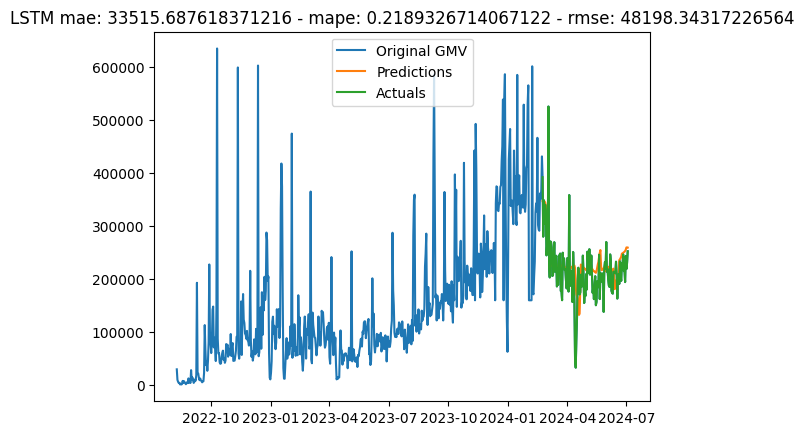

In [ ]:
plot_predictions2(model4, X2_test, y2_test, 'LSTM')

In [ ]:
model5 = Sequential()
model5.add(InputLayer(input_shape=(7, 13)))
model5.add(Conv1D(64, kernel_size=2))
model5.add(Flatten())
model5.add(Dense(8, 'relu'))
model5.add(Dense(1, 'linear'))

model5.summary()
model5.compile(loss='mse', optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 6, 64)             1728      
                                                                 
 flatten_1 (Flatten)         (None, 384)               0         
                                                                 
 dense_14 (Dense)            (None, 8)                 3080      
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 4817 (18.82 KB)
Trainable params: 4817 (18.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history2 = model5.fit(X2_train, y2_train, epochs=20)

Epoch 1/20
18/18 [==============================] - 1s 2ms/step - loss: 128944.7734 - root_mean_squared_error: 359.0888
Epoch 2/20
18/18 [==============================] - 0s 2ms/step - loss: 36789.3086 - root_mean_squared_error: 191.8054
Epoch 3/20
18/18 [==============================] - 0s 2ms/step - loss: 11436.6748 - root_mean_squared_error: 106.9424
Epoch 4/20
18/18 [==============================] - 0s 2ms/step - loss: 8056.5020 - root_mean_squared_error: 89.7580
Epoch 5/20
18/18 [==============================] - 0s 3ms/step - loss: 6406.9946 - root_mean_squared_error: 80.0437
Epoch 6/20
18/18 [==============================] - 0s 2ms/step - loss: 5112.1572 - root_mean_squared_error: 71.4994
Epoch 7/20
18/18 [==============================] - 0s 2ms/step - loss: 4135.1040 - root_mean_squared_error: 64.3048
Epoch 8/20
18/18 [==============================] - 0s 2ms/step - loss: 3343.9155 - root_mean_squared_error: 57.8266
Epoch 9/20
18/18 [==============================] - 0s 2m

5/5 [==============================] - 0s 2ms/step


,Predictions,Actuals
date,,
2024-06-27,-941211.000,214500.0
2024-06-28,-940133.250,218507.0
2024-06-29,-998143.250,193665.0
2024-06-30,-998617.000,242967.0
2024-07-01,-963887.375,218320.0
2024-07-02,-946163.375,229796.0
2024-07-03,-901439.000,251898.0


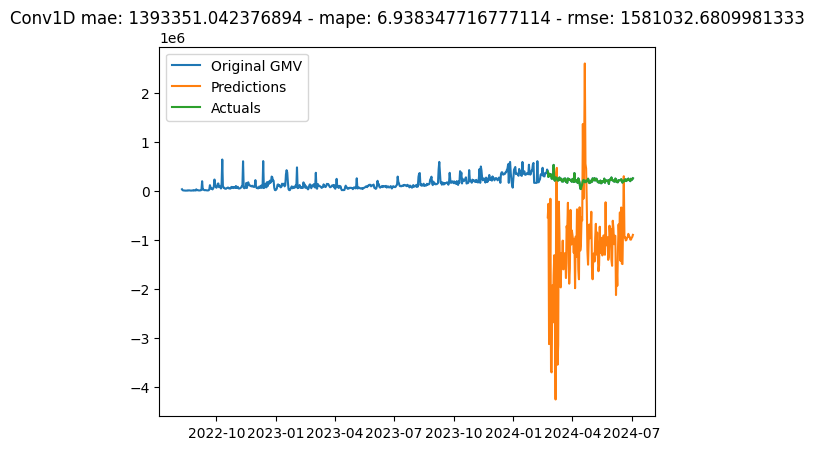

In [ ]:
plot_predictions2(model5, X2_test, y2_test, 'Conv1D')

In [ ]:
model6 = Sequential()
model6.add(InputLayer(input_shape=(7, 13)))
model6.add(LSTM(64, return_sequences=True))
model6.add(Dropout(0.5))
model6.add(LSTM(32))
model6.add(Dropout(0.5))
model6.add(Dense(8, 'relu'))
model6.add(Dense(1, 'linear'))

model6.summary()
model6.compile(loss='mse', optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 7, 64)             19968     
                                                                 
 dropout_4 (Dropout)         (None, 7, 64)             0         
                                                                 
 lstm_11 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_16 (Dense)            (None, 8)                 264       
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 32657 (127.57 KB)
Trainable params: 3265

In [ ]:
history3 = model6.fit(X2_train, y2_train, epochs=20)

Epoch 1/20
18/18 [==============================] - 5s 10ms/step - loss: 1.2340 - root_mean_squared_error: 1.1108
Epoch 2/20
18/18 [==============================] - 0s 11ms/step - loss: 1.1491 - root_mean_squared_error: 1.0720
Epoch 3/20
18/18 [==============================] - 0s 9ms/step - loss: 1.1216 - root_mean_squared_error: 1.0591
Epoch 4/20
18/18 [==============================] - 0s 9ms/step - loss: 1.0502 - root_mean_squared_error: 1.0248
Epoch 5/20
18/18 [==============================] - 0s 11ms/step - loss: 1.0467 - root_mean_squared_error: 1.0231
Epoch 6/20
18/18 [==============================] - 0s 10ms/step - loss: 1.0136 - root_mean_squared_error: 1.0068
Epoch 7/20
18/18 [==============================] - 0s 11ms/step - loss: 1.0022 - root_mean_squared_error: 1.0011
Epoch 8/20
18/18 [==============================] - 0s 9ms/step - loss: 1.0134 - root_mean_squared_error: 1.0067
Epoch 9/20
18/18 [==============================] - 0s 9ms/step - loss: 1.0013 - root_mean_

5/5 [==============================] - 1s 4ms/step


,Predictions,Actuals
date,,
2024-06-27,170029.593750,214500.0
2024-06-28,170064.375000,218507.0
2024-06-29,170092.062500,193665.0
2024-06-30,170120.593750,242967.0
2024-07-01,170171.375000,218320.0
2024-07-02,170021.500000,229796.0
2024-07-03,169951.453125,251898.0


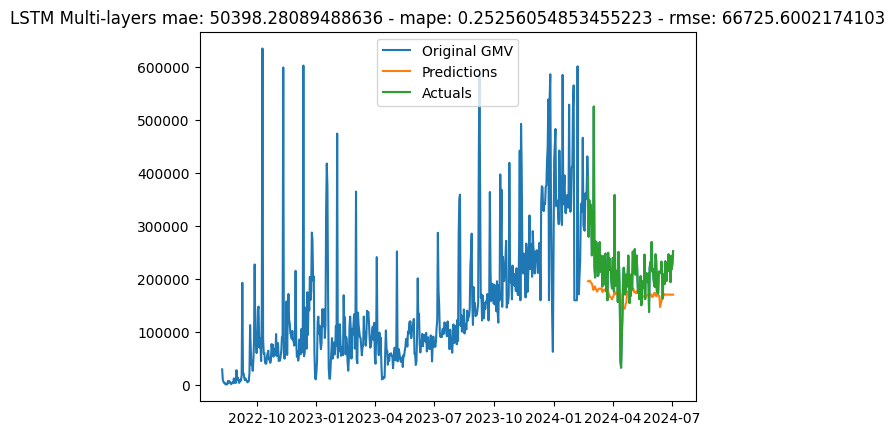

In [ ]:
plot_predictions2(model6, X2_test, y2_test, 'LSTM Multi-layers')

In [ ]:
model7 = Sequential()
model7.add(InputLayer(input_shape=(7, 13)))
model7.add(LSTM(64, return_sequences=True))
model7.add(LSTM(32))
model7.add(Dense(8, 'relu'))
model7.add(Dense(1, 'linear'))

model7.summary()
model7.compile(loss='mse', optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 7, 64)             19968     
                                                                 
 lstm_13 (LSTM)              (None, 32)                12416     
                                                                 
 dense_18 (Dense)            (None, 8)                 264       
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 32657 (127.57 KB)
Trainable params: 32657 (127.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model7.fit(X2_train, y2_train, epochs=20)

Epoch 1/20
18/18 [==============================] - 6s 14ms/step - loss: 0.9976 - root_mean_squared_error: 0.9988
Epoch 2/20
18/18 [==============================] - 0s 15ms/step - loss: 0.9088 - root_mean_squared_error: 0.9533
Epoch 3/20
18/18 [==============================] - 0s 16ms/step - loss: 0.8601 - root_mean_squared_error: 0.9274
Epoch 4/20
18/18 [==============================] - 0s 16ms/step - loss: 0.8233 - root_mean_squared_error: 0.9073
Epoch 5/20
18/18 [==============================] - 0s 16ms/step - loss: 0.7869 - root_mean_squared_error: 0.8871
Epoch 6/20
18/18 [==============================] - 0s 15ms/step - loss: 0.7484 - root_mean_squared_error: 0.8651
Epoch 7/20
18/18 [==============================] - 0s 22ms/step - loss: 0.7139 - root_mean_squared_error: 0.8449
Epoch 8/20
18/18 [==============================] - 1s 29ms/step - loss: 0.6825 - root_mean_squared_error: 0.8261
Epoch 9/20
18/18 [==============================] - 0s 20ms/step - loss: 0.6554 - root_m

5/5 [==============================] - 1s 4ms/step


,Predictions,Actuals
date,,
2024-06-27,231640.21875,214500.0
2024-06-28,230844.03125,218507.0
2024-06-29,229365.12500,193665.0
2024-06-30,227334.71875,242967.0
2024-07-01,226275.68750,218320.0
2024-07-02,226250.34375,229796.0
2024-07-03,227187.21875,251898.0


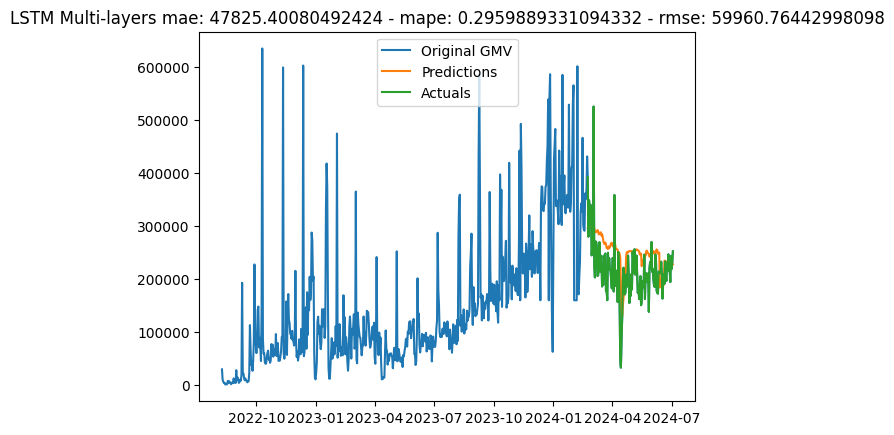

In [ ]:
plot_predictions2(model7, X2_test, y2_test, 'LSTM Multi-layers')

In [ ]:
from keras.optimizers.legacy import SGD

# initializing the RNN
regressor = Sequential()

# adding RNN layers and dropout regularization
regressor.add(SimpleRNN(units = 50,
                        activation = "tanh",
                        return_sequences = True,
                        input_shape=(7, 13)))
regressor.add(Dropout(0.2))

regressor.add(SimpleRNN(units = 50,
                        activation = "tanh",
                        return_sequences = True))

regressor.add(SimpleRNN(units = 50,
                        activation = "tanh",
                        return_sequences = True))

regressor.add( SimpleRNN(units = 50))

# adding the output layer
regressor.add(Dense(units = 1,activation='sigmoid'))

# compiling RNN
regressor.compile(optimizer = SGD(learning_rate=0.01,
                                  decay=1e-6,
                                  momentum=0.9,
                                  nesterov=True),
                  loss = "mean_squared_error")

# fitting the model
regressor.fit(X2_train, y2_train, epochs = 20, batch_size = 2)
regressor.summary()

Epoch 1/20
278/278 [==============================] - 6s 10ms/step - loss: 1.0198
Epoch 2/20
278/278 [==============================] - 6s 22ms/step - loss: 1.0356
Epoch 3/20
278/278 [==============================] - 3s 10ms/step - loss: 1.0047
Epoch 4/20
278/278 [==============================] - 2s 8ms/step - loss: 1.0135
Epoch 5/20
278/278 [==============================] - 2s 8ms/step - loss: 1.0138
Epoch 6/20
278/278 [==============================] - 2s 8ms/step - loss: 1.0138
Epoch 7/20
278/278 [==============================] - 3s 11ms/step - loss: 1.0138
Epoch 8/20
278/278 [==============================] - 3s 11ms/step - loss: 1.0137
Epoch 9/20
278/278 [==============================] - 2s 7ms/step - loss: 1.0139
Epoch 10/20
278/278 [==============================] - 2s 8ms/step - loss: 1.0136
Epoch 11/20
278/278 [==============================] - 2s 8ms/step - loss: 1.0130
Epoch 12/20
278/278 [==============================] - 2s 8ms/step - loss: 1.0133
Epoch 13/20
278/278 

In [ ]:
#Initialising the model
regressorLSTM = Sequential()

#Adding LSTM layers
regressorLSTM.add(LSTM(50,
                       return_sequences = True,
                       input_shape=(7, 13)))
regressorLSTM.add(LSTM(50,
                       return_sequences = False))
regressorLSTM.add(Dense(25))

#Adding the output layer
regressorLSTM.add(Dense(1))

#Compiling the model
regressorLSTM.compile(optimizer = 'adam',
                      loss = 'mean_squared_error',
                      metrics = ["accuracy"])

#Fitting the model
regressorLSTM.fit(X2_train,
                  y2_train,
                  batch_size = 1,
                  epochs = 12)
regressorLSTM.summary()

Epoch 1/12
556/556 [==============================] - 8s 8ms/step - loss: 0.7864 - accuracy: 0.0000e+00
Epoch 2/12
556/556 [==============================] - 6s 10ms/step - loss: 0.6862 - accuracy: 0.0000e+00
Epoch 3/12
556/556 [==============================] - 3s 6ms/step - loss: 0.6498 - accuracy: 0.0000e+00
Epoch 4/12
556/556 [==============================] - 3s 6ms/step - loss: 0.6860 - accuracy: 0.0000e+00
Epoch 5/12
556/556 [==============================] - 5s 9ms/step - loss: 0.6088 - accuracy: 0.0000e+00
Epoch 6/12
556/556 [==============================] - 4s 7ms/step - loss: 0.5610 - accuracy: 0.0000e+00
Epoch 7/12
556/556 [==============================] - 3s 6ms/step - loss: 0.6198 - accuracy: 0.0000e+00
Epoch 8/12
556/556 [==============================] - 3s 6ms/step - loss: 0.5846 - accuracy: 0.0000e+00
Epoch 9/12
556/556 [==============================] - 5s 9ms/step - loss: 0.6075 - accuracy: 0.0000e+00
Epoch 10/12
556/556 [==============================] - 4s 7ms/s

In [ ]:
#Initialising the model
regressorGRU = Sequential()

# GRU layers with Dropout regularisation
regressorGRU.add(GRU(units=50,
                     return_sequences=True,
                     input_shape=(7,13),
                     activation='tanh'))
regressorGRU.add(Dropout(0.2))

regressorGRU.add(GRU(units=50,
                     return_sequences=True,
                     activation='tanh'))

regressorGRU.add(GRU(units=50,
                     return_sequences=True,
                     activation='tanh'))

regressorGRU.add(GRU(units=50,
                     activation='tanh'))

# The output layer
regressorGRU.add(Dense(units=1,
                       activation='relu'))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(learning_rate=0.01,
                                   decay=1e-7,
                                   momentum=0.9,
                                   nesterov=False),
                     loss='mean_squared_error')

# Fitting the data
regressorGRU.fit(X2_train,y2_train,epochs=20,batch_size=1)
regressorGRU.summary()

Epoch 1/20
556/556 [==============================] - 16s 13ms/step - loss: 1.0229
Epoch 2/20
556/556 [==============================] - 7s 13ms/step - loss: 1.0140
Epoch 3/20
556/556 [==============================] - 6s 10ms/step - loss: 1.0140
Epoch 4/20
556/556 [==============================] - 7s 12ms/step - loss: 1.0140
Epoch 5/20
556/556 [==============================] - 7s 12ms/step - loss: 1.0140
Epoch 6/20
556/556 [==============================] - 6s 10ms/step - loss: 1.0140
Epoch 7/20
556/556 [==============================] - 7s 13ms/step - loss: 1.0140
Epoch 8/20
556/556 [==============================] - 6s 10ms/step - loss: 1.0140
Epoch 9/20
556/556 [==============================] - 7s 13ms/step - loss: 1.0140
Epoch 10/20
556/556 [==============================] - 6s 11ms/step - loss: 1.0140
Epoch 11/20
556/556 [==============================] - 6s 11ms/step - loss: 1.0140
Epoch 12/20
556/556 [==============================] - 7s 12ms/step - loss: 1.0140
Epoch 13/20


5/5 [==============================] - 1s 4ms/step


,Predictions,Actuals
date,,
2024-06-27,184542.031250,214500.0
2024-06-28,184237.921875,218507.0
2024-06-29,183770.593750,193665.0
2024-06-30,183830.953125,242967.0
2024-07-01,185174.312500,218320.0
2024-07-02,184543.343750,229796.0
2024-07-03,184134.875000,251898.0


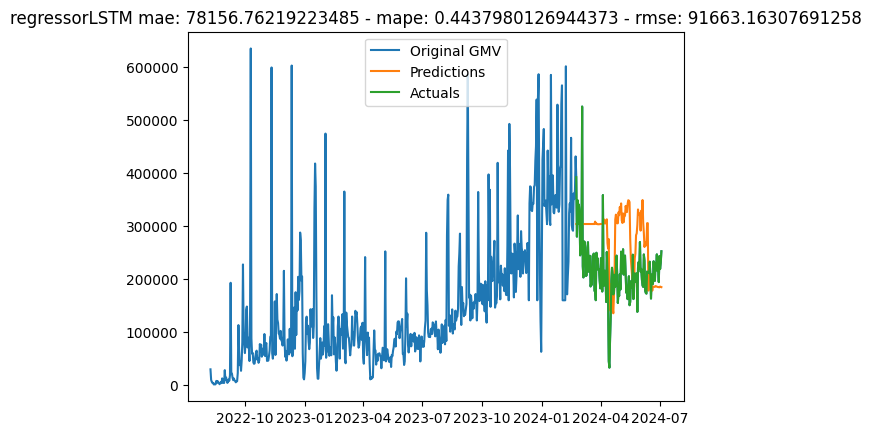

In [ ]:
plot_predictions2(regressorLSTM, X2_test, y2_test, 'regressorLSTM')

5/5 [==============================] - 1s 5ms/step


,Predictions,Actuals
date,,
2024-06-27,145493.65625,214500.0
2024-06-28,145493.65625,218507.0
2024-06-29,145493.65625,193665.0
2024-06-30,145493.65625,242967.0
2024-07-01,145493.65625,218320.0
2024-07-02,145493.65625,229796.0
2024-07-03,145493.65625,251898.0


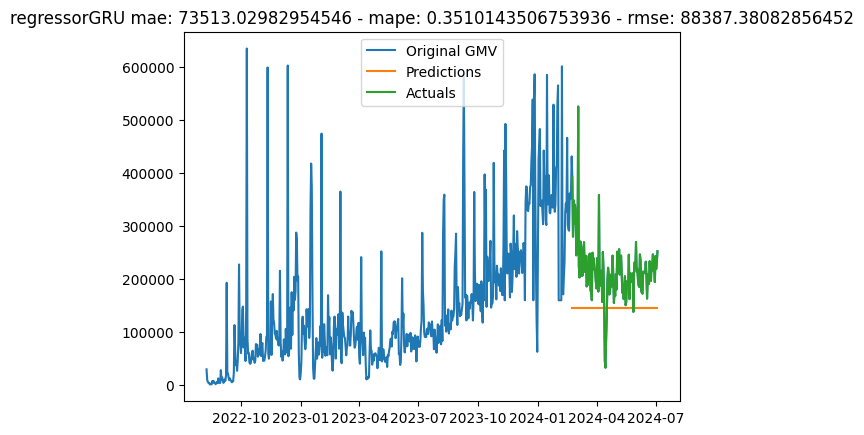

In [ ]:
plot_predictions2(regressorGRU, X2_test, y2_test, 'regressorGRU')

5/5 [==============================] - 0s 4ms/step


,Predictions,Actuals
date,,
2024-06-27,148126.515625,214500.0
2024-06-28,148126.515625,218507.0
2024-06-29,148126.515625,193665.0
2024-06-30,148126.515625,242967.0
2024-07-01,148126.515625,218320.0
2024-07-02,148126.515625,229796.0
2024-07-03,148126.515625,251898.0


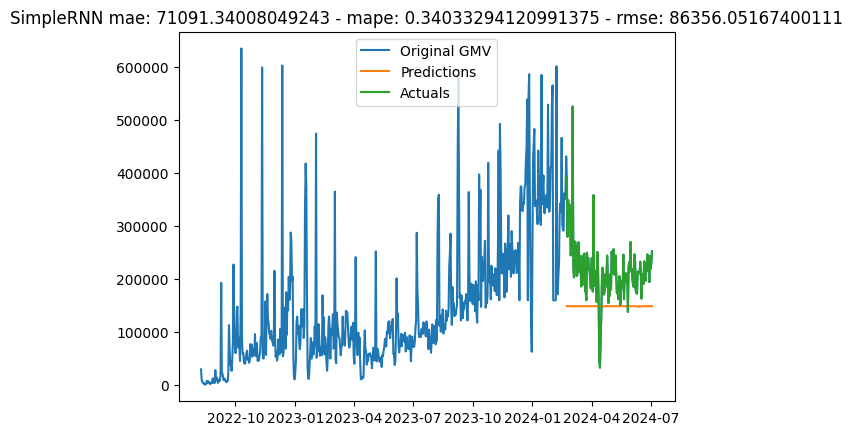

In [ ]:
plot_predictions2(regressor, X2_test, y2_test, 'SimpleRNN')